**1. Import Necessary Liberaries**

In [127]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,f1_score,r2_score,confusion_matrix
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle

**2. Import Data From CSV File**

In [2]:
df = pd.read_csv('Heart.csv')
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Drop Unwanted Columns**

In [3]:
df.drop('Unnamed: 0',1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


**3. Find Total Number of NaN in Every Columns**

In [6]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

**4. Total Number Of NaN is Very less.And Data is not Large/Big. We fill the NaN Values using fillna function by ffill and bfill method** 

In [7]:
df['Ca'].fillna(method='ffill',inplace=True)
df['Thal'].fillna(method='ffill',inplace=True)

In [8]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [9]:
df.nunique()

Age           41
Sex            2
ChestPain      4
RestBP        50
Chol         152
Fbs            2
RestECG        3
MaxHR         91
ExAng          2
Oldpeak       40
Slope          3
Ca             4
Thal           3
AHD            2
dtype: int64

In [10]:
for i in df.columns:
  print(df[i].value_counts())
  print('--'*50)

58    19
57    17
54    16
59    14
52    13
60    12
51    12
56    11
62    11
44    11
64    10
41    10
67     9
63     9
42     8
43     8
45     8
53     8
55     8
61     8
65     8
50     7
66     7
48     7
46     7
47     5
49     5
70     4
68     4
35     4
39     4
69     3
71     3
40     3
34     2
37     2
38     2
29     1
77     1
74     1
76     1
Name: Age, dtype: int64
----------------------------------------------------------------------------------------------------
1    206
0     97
Name: Sex, dtype: int64
----------------------------------------------------------------------------------------------------
asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64
----------------------------------------------------------------------------------------------------
120    37
130    36
140    32
110    19
150    17
138    12
128    12
160    11
125    11
112     9
132     8
118     7
124     6
108     6
135     6
15

In [11]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.683168
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.944808
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


**5. EDA , VISUALIZATION**

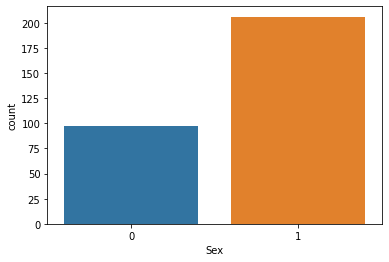

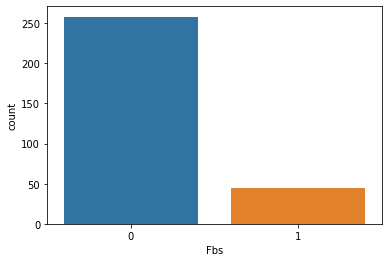

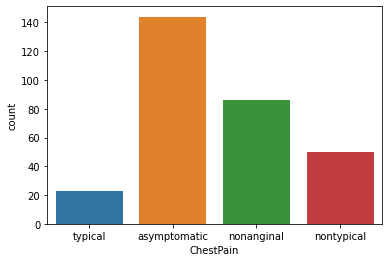

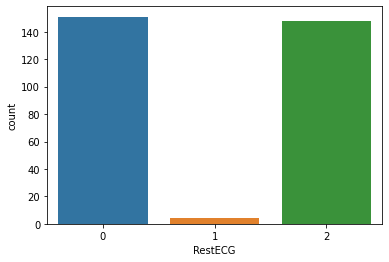

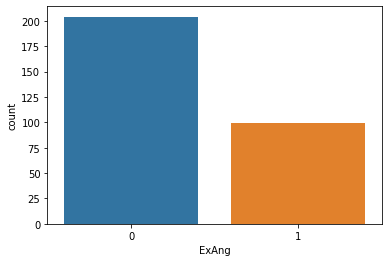

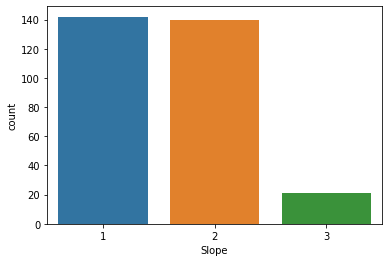

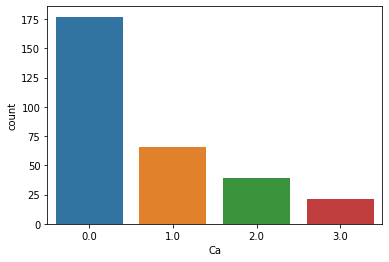

In [13]:
lst = ['Sex','Fbs','ChestPain','RestECG','ExAng','Slope','Ca']
for i in lst:
  sns.countplot(x=i,data=df)
  plt.show()

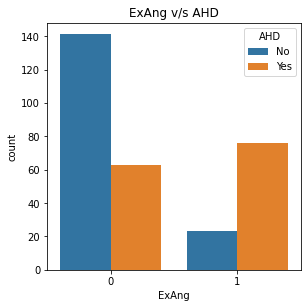

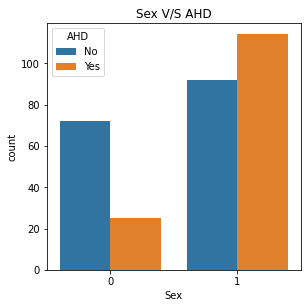

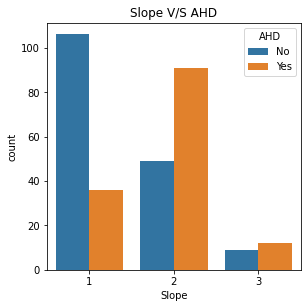

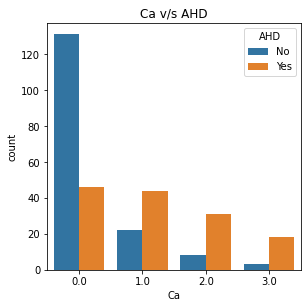

In [35]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x='ExAng',hue='AHD',data=df)
plt.title('ExAng v/s AHD')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
sns.countplot(x='Sex',hue='AHD',data=df)
plt.title('Sex V/S AHD')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
sns.countplot(x='Slope',hue='AHD',data=df)
plt.title('Slope V/S AHD')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,2,4)
sns.countplot(x='Ca',hue='AHD',data=df)
plt.title('Ca v/s AHD')
plt.show()



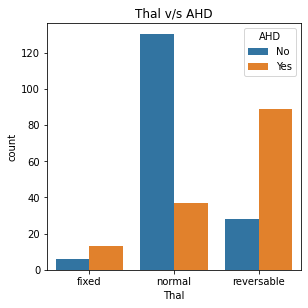

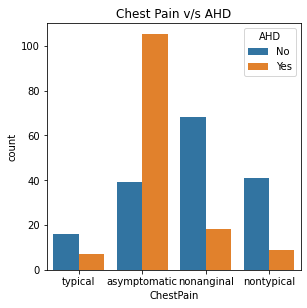

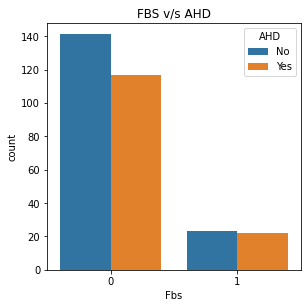

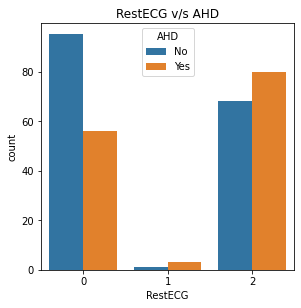

In [36]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x='Thal',hue='AHD',data=df)
plt.title('Thal v/s AHD')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
sns.countplot(x='ChestPain',hue='AHD',data=df)
plt.title('Chest Pain v/s AHD')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
sns.countplot(x='Fbs',hue='AHD',data=df)
plt.title('FBS v/s AHD')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,2,4)
sns.countplot(x='RestECG',hue='AHD',data=df)
plt.title('RestECG v/s AHD')
plt.show()


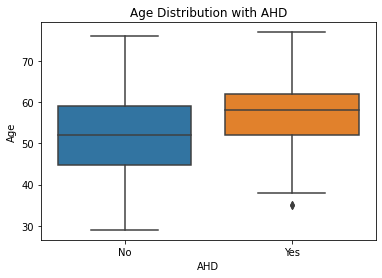

In [37]:
sns.boxplot(x='AHD',y='Age',data=df)
plt.title('Age Distribution with AHD')
plt.show()

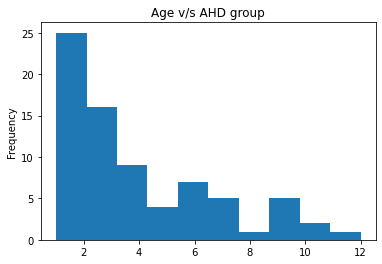

In [38]:
df.groupby('Age')['AHD'].value_counts().plot(kind='hist')
plt.title('Age v/s AHD group')
plt.show()

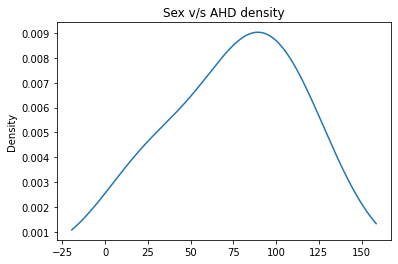

In [39]:
df.groupby('Sex')['AHD'].value_counts().plot(kind='kde')
plt.title('Sex v/s AHD density')
plt.show()

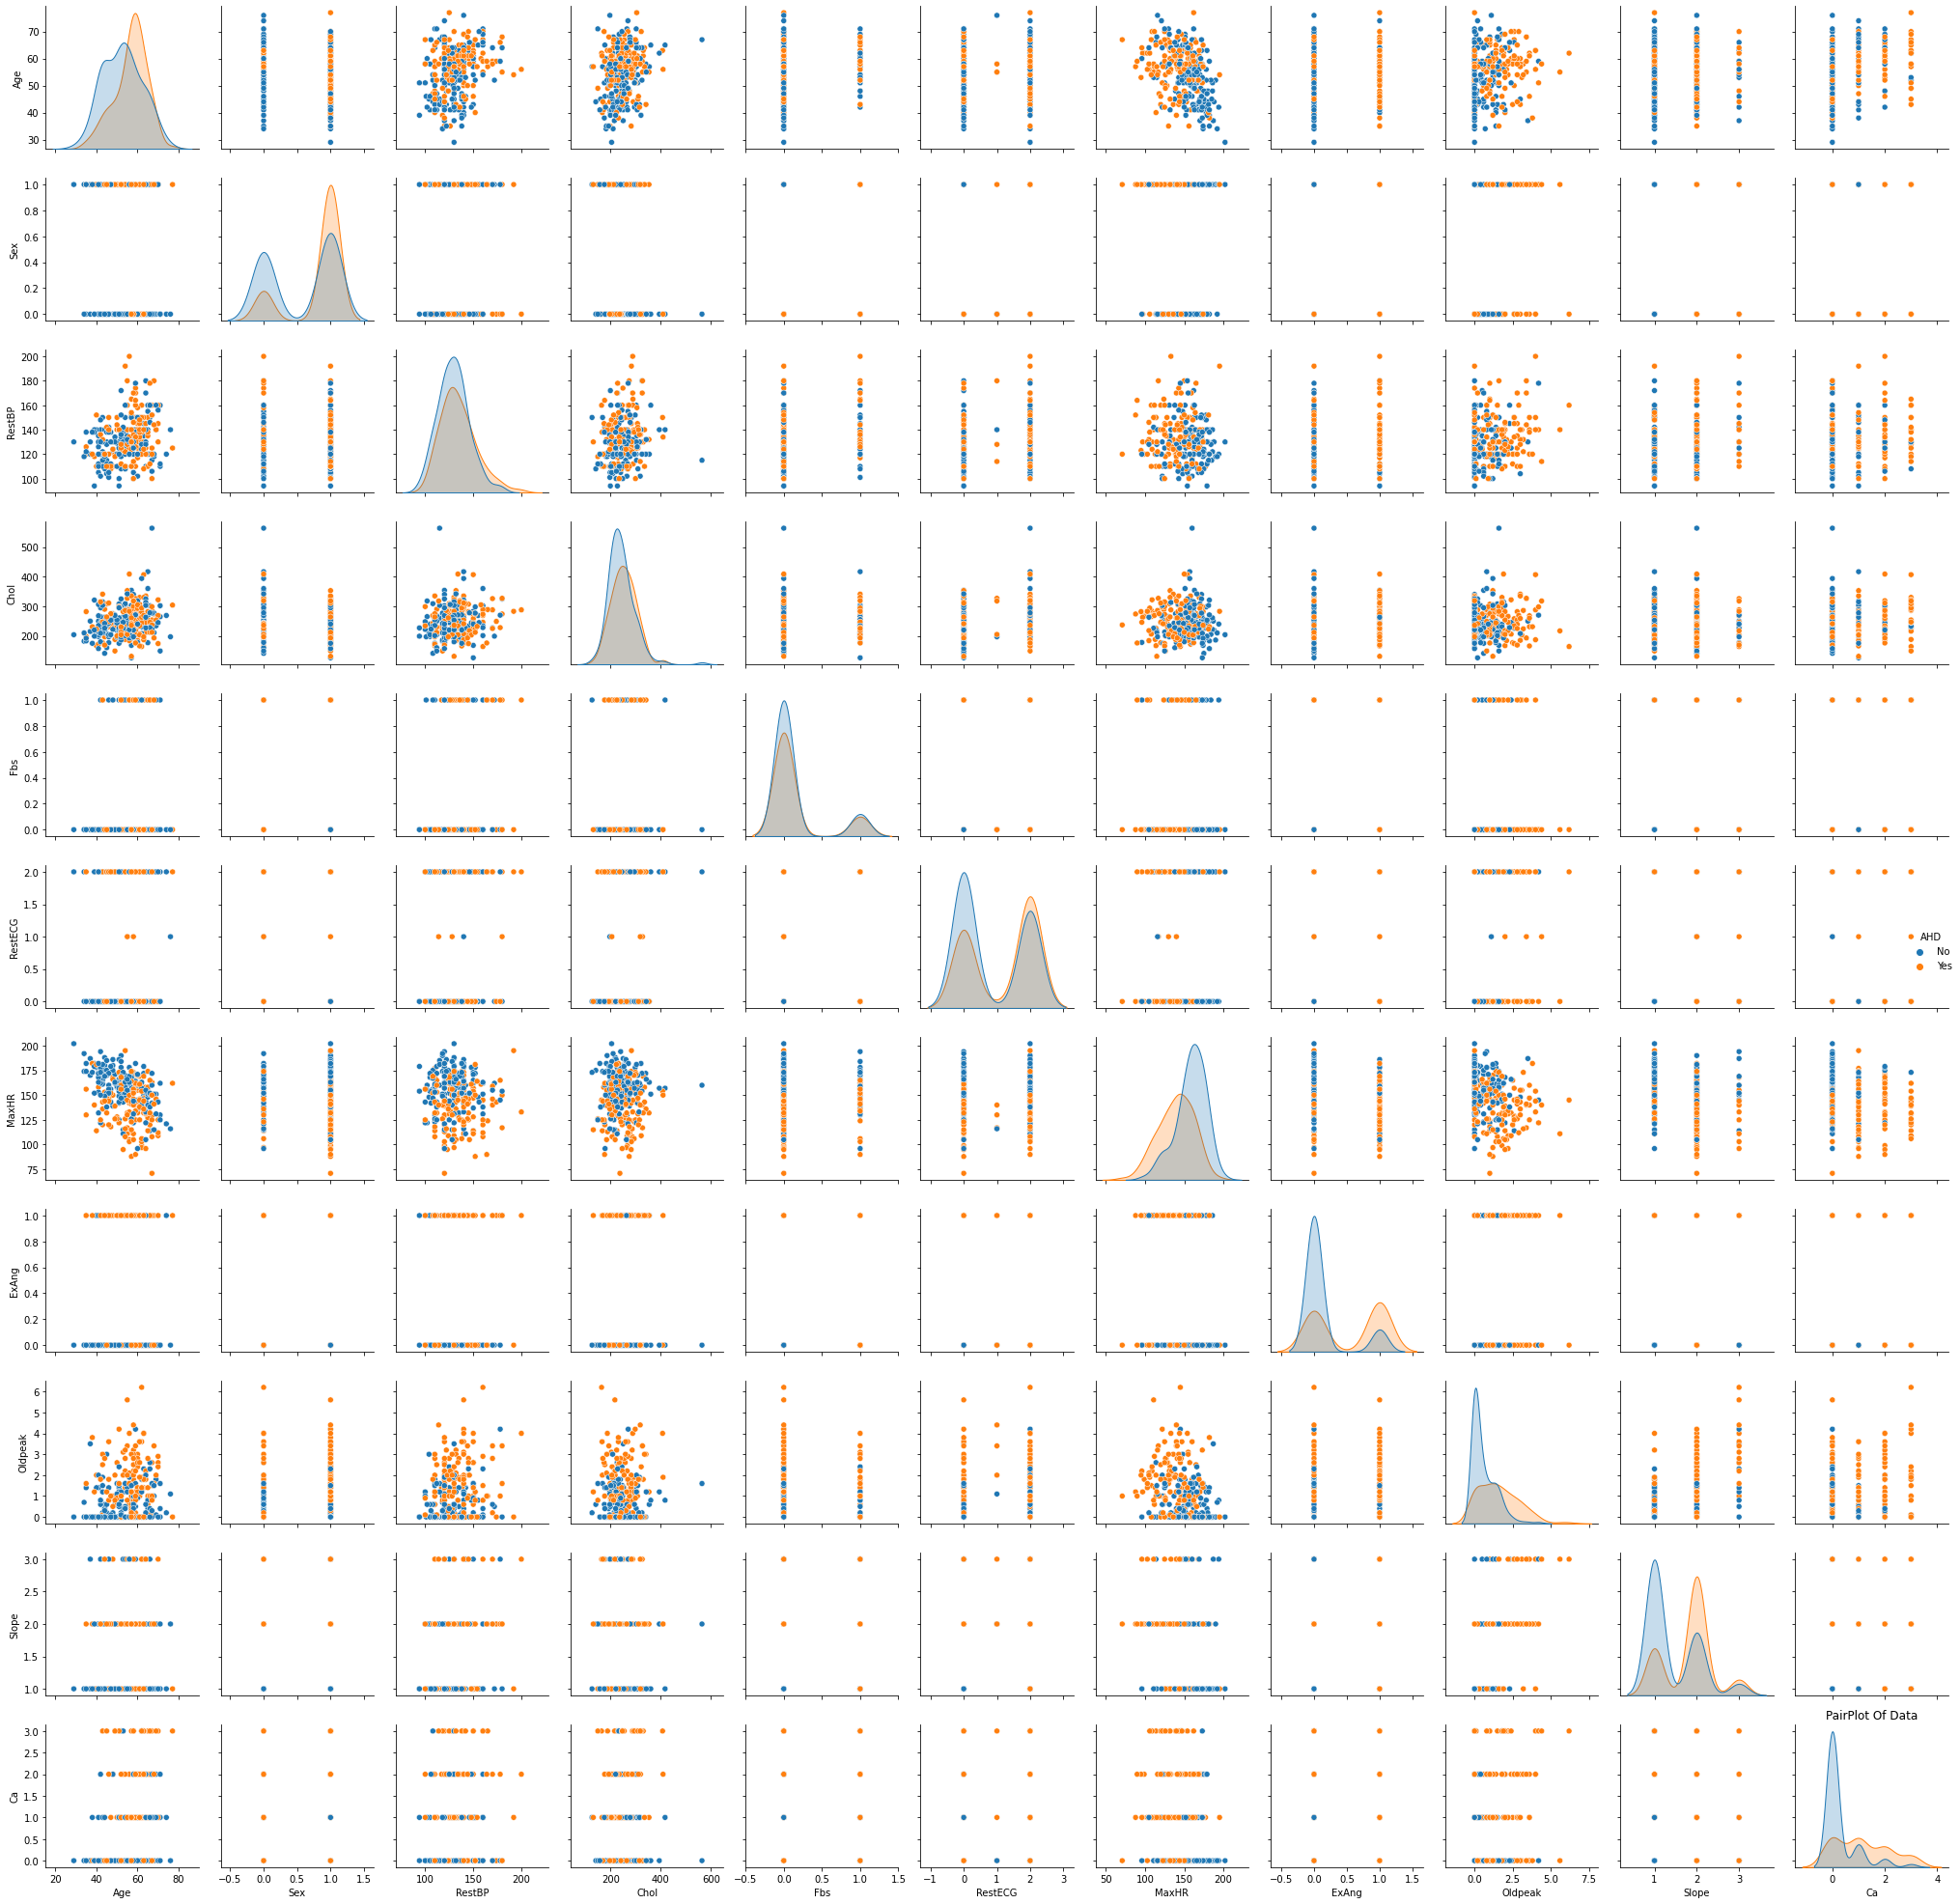

In [40]:
sns.pairplot(df,hue='AHD')
plt.title('PairPlot Of Data')
plt.tight_layout()
plt.show()

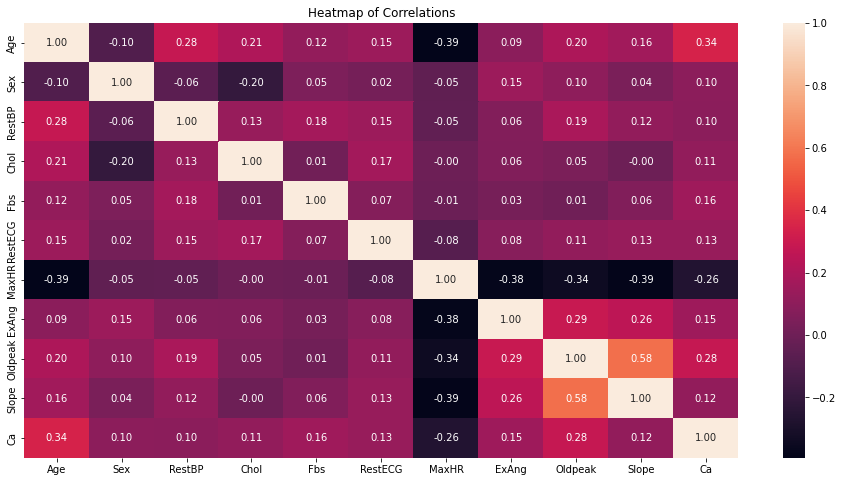

In [41]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cbar=True)
plt.title('Heatmap of Correlations')
plt.show()

**6 — Encoding the Categorical Data**

As the Dependent variable consists of strings, therefore they have to be encoded in binary format so that our model does not find any problem in classifying.To encode we use Label Encoder class from Scikit-learn library of python.

In [42]:
df['ChestPain'] = LabelEncoder().fit_transform(df['ChestPain'])
df['Thal'] = LabelEncoder().fit_transform(df['Thal'])
df['AHD'] = LabelEncoder().fit_transform(df['AHD'])

**7.-divide the data set into Dependent (y) and Independent (X) variable.**

In [43]:
X = df.drop('AHD',1)
y = df['AHD']

**8 — Splitting the Data set into Training Set and Test Set**

Now for training and testing the model we first split the data into training set and test set. For splitting the data set into train and test we use model selection library from Scikit-learn

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=142)

**Machine Learning Model Building**

We have to build the best model to classify the cells. Therefore we have to train and test the dataset with multiple Machine Learning Algorithms and determine the best model with high accuracy.

***A. Logistic Regression Model***

In [46]:
model1 = LogisticRegression().fit(X_train,y_train)
model1

LogisticRegression()

F1 Score of Logistic Regression => 0.8750000000000001
R2 Score of Logistic Regression => 0.6013071895424836
Accuracy Score Of Logistic Regression => 0.9016393442622951
Classification Report of Logistic Regression =>
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        34
           1       1.00      0.78      0.88        27

    accuracy                           0.90        61
   macro avg       0.93      0.89      0.90        61
weighted avg       0.92      0.90      0.90        61

Confusion Matrics of Logistic Regression =>


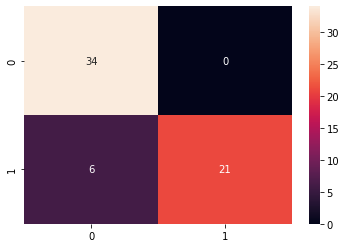

In [56]:
print('F1 Score of Logistic Regression =>',f1_score(y_test,model1.predict(X_test)))
print('R2 Score of Logistic Regression =>',r2_score(y_test,model1.predict(X_test)))
print('Accuracy Score Of Logistic Regression =>',accuracy_score(y_test,model1.predict(X_test)))
print('Classification Report of Logistic Regression =>\n',classification_report(y_test,model1.predict(X_test)))
print('Confusion Matrics of Logistic Regression =>')
sns.heatmap(confusion_matrix(y_test,model1.predict(X_test)),annot=True)
plt.show()

***B. DecisionTree Regressor Model***

In [66]:
model2 = DecisionTreeRegressor(criterion="squared_error",splitter='best',max_depth=20).fit(X_train,y_train)
model2

DecisionTreeRegressor(max_depth=20)

Accuracy of  Decision Tree Regressor => 0.9016393442622951
R2 -Score of Decision Tree Regressor => 0.6013071895424836
F1 -Score of Decision Tree Regressor=> 0.8888888888888888
Classification Report of Decision Tree Regressor=>
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        34
           1       0.89      0.89      0.89        27

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

HeatMap oF Confusion Matrix Decision Tree Regressor


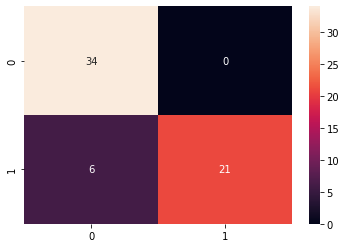

In [125]:
print('Accuracy of  Decision Tree Regressor =>',accuracy_score(y_test,model2.predict(X_test)))
print("R2 -Score of Decision Tree Regressor =>",r2_score(y_test,model2.predict(X_test)))
print("F1 -Score of Decision Tree Regressor=>",f1_score(y_test,model2.predict(X_test)))
print('Classification Report of Decision Tree Regressor=>\n',(classification_report(y_test,model2.predict(X_test))))
print('HeatMap oF Confusion Matrix Decision Tree Regressor')
sns.heatmap(confusion_matrix(y_test,model1.predict(X_test)),annot=True)
plt.show()

***C. Random Forest Regressor Model***

In [90]:
model3 = RandomForestRegressor(n_estimators=200,criterion='squared_error',random_state=250).fit(X_train,y_train)
model3

RandomForestRegressor(n_estimators=200, random_state=250)

In [91]:
y_pred = model3.predict(X_test)
y_pred = np.rint(y_pred)

Accuracy of  Random Forest Regressor => 0.8688524590163934
R2 -Score of Random Forest Regressor => 0.46840958605664484
F1 -Score of Random Forest Regressor=> 0.8461538461538461
Classification Report of Random Forest Regressor=>
               precision    recall  f1-score   support

           0       0.86      0.91      0.89        34
           1       0.88      0.81      0.85        27

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61

HeatMap oF Confusion Matrix Random Forest Regressor


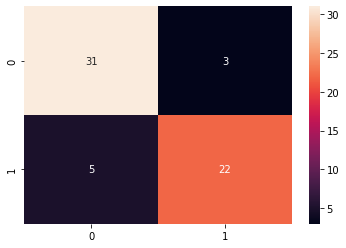

In [117]:
print('Accuracy of  Random Forest Regressor =>',accuracy_score(y_test,y_pred))
print("R2 -Score of Random Forest Regressor =>",r2_score(y_test,y_pred))
print("F1 -Score of Random Forest Regressor=>",f1_score(y_test,y_pred))
print('Classification Report of Random Forest Regressor=>\n',(classification_report(y_test,y_pred)))
print('HeatMap oF Confusion Matrix Random Forest Regressor')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

***D. RandomForest Classifier Model***

In [98]:
model4 = RandomForestClassifier(n_estimators=250,criterion='entropy',random_state=250).fit(X_train,y_train)
model4

RandomForestClassifier(criterion='entropy', n_estimators=250, random_state=250)

Accuracy of Random Forest Classifier => 0.8688524590163934
R2 -Score of Random Forest Classifier => 0.46840958605664484
F1 -Score of Random Forest Classifier=> 0.8461538461538461
Classification Report of Random Forest Classifier=>
               precision    recall  f1-score   support

           0       0.86      0.91      0.89        34
           1       0.88      0.81      0.85        27

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61

HeatMap oF Confusion Matrix Random Forest Classifier


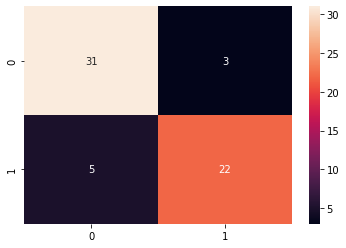

In [118]:
print('Accuracy of Random Forest Classifier =>',accuracy_score(y_test,model4.predict(X_test)))
print("R2 -Score of Random Forest Classifier =>",r2_score(y_test,model4.predict(X_test)))
print("F1 -Score of Random Forest Classifier=>",f1_score(y_test,model4.predict(X_test)))
print('Classification Report of Random Forest Classifier=>\n',(classification_report(y_test,model4.predict(X_test))))
print('HeatMap oF Confusion Matrix Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test,model4.predict(X_test)),annot=True)
plt.show()
     

***E. KNeighbors Classifier Model***

In [114]:
model5 = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2).fit(X_train,y_train)
model5

KNeighborsClassifier()

Accuracy of KNeighbors Classifier => 0.7377049180327869
R2 -Score of KNeighbors Classifier => -0.06318082788671031
F1 -Score of KNeighbors Classifier=> 0.7142857142857143
Classification Report of KNeighbors Classifier=>
               precision    recall  f1-score   support

           0       0.78      0.74      0.76        34
           1       0.69      0.74      0.71        27

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

HeatMap oF Confusion Matrix KNeighbors Classifier


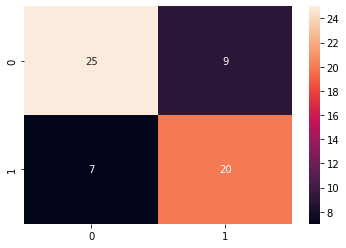

In [126]:
print('Accuracy of KNeighbors Classifier =>',accuracy_score(y_test,model5.predict(X_test)))
print("R2 -Score of KNeighbors Classifier =>",r2_score(y_test,model5.predict(X_test)))
print("F1 -Score of KNeighbors Classifier=>",f1_score(y_test,model5.predict(X_test)))
print('Classification Report of KNeighbors Classifier=>\n',(classification_report(y_test,model5.predict(X_test))))
print('HeatMap oF Confusion Matrix KNeighbors Classifier')
sns.heatmap(confusion_matrix(y_test,model5.predict(X_test)),annot=True)
plt.show()

***F. DecisionTree Classifier Model*** 

In [132]:
model6 = DecisionTreeClassifier(criterion='gini',splitter='best').fit(X_train,y_train)
model6

DecisionTreeClassifier()

Accuracy of  Decision Tree Classifier => 0.9016393442622951
R2 -Score of Decision Tree Classifier => 0.6013071895424836
F1 -Score of Decision Tree Classifier=> 0.8928571428571429
Classification Report of Decision Tree Classifier=>
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        34
           1       0.86      0.93      0.89        27

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

HeatMap oF Confusion Matrix Decision Tree Classifier


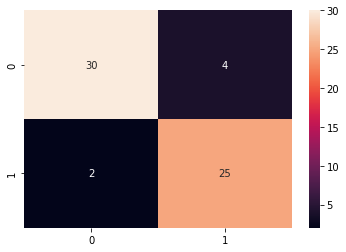

In [133]:
print('Accuracy of  Decision Tree Classifier =>',accuracy_score(y_test,model6.predict(X_test)))
print("R2 -Score of Decision Tree Classifier =>",r2_score(y_test,model6.predict(X_test)))
print("F1 -Score of Decision Tree Classifier=>",f1_score(y_test,model6.predict(X_test)))
print('Classification Report of Decision Tree Classifier=>\n',(classification_report(y_test,model6.predict(X_test))))
print('HeatMap oF Confusion Matrix Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test,model6.predict(X_test)),annot=True)
plt.show()

***Saving and Loading the Model***

After completion of the Machine Learning project, the ML model need to deploy in an application. To deploy the ML model , we need to save it first. To save the Machine Learning project we can use the pickle package.Here I have used pickle package of python to load and save the model.The pickle or joblib package saves the model to that address, later on to deploy the model we can simply load the model through the pickle file.

In [138]:
pickle.dump(model6,open('Heart_Disease.pickle','wb'))
pickle_saved_model = pickle.load(open('Heart_Disease.pickle','rb'))

In [139]:
pickle_saved_model.predict(X[0:10])

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

***Conclusion:***

After training all the algorithms , we found that Random Forest Regression, KNN, Decision Tree Classification , Random Forest Classification Model have high accuracy. From them we choose the Decision Tree Classification Model as it gives the highest accuracy.

I hope you understood this Machine Learning Project and enjoyed it.I hope my efforts will be valuable for saving the life of Heart Disease Patients.I hope more improvised model comes up with more accuracy and help us to tackle this problem.